# MENTORÍA: Predicción de indicadores sociales para países del MERCOSUR

## Práctico 3: Introducción a ML - Aprendizaje Supervisado

### Introducción

En el presente práctico, se intentará predecir los valores para el Índice de Gini, mediante el uso de algoritmos de aprendizaje supervisado (AS). Para ello se tendrán en cuenta los valores de Argentina, Brasil, Uruguay y Paraguay, y diferentes features de los indicadores de pobreza, protección social y educación. Además, el año será otro feature más de análisis.

En primer lugar, se construirá un dataset que incluya a todos los países mencionados, y los valores de varios features de interés (una columna por feature), desde el año 1990 a 2018. Luego, se construirán modelos de AS: regresiones lineales, polinomiales, y árboles de decisión. Dichos modelos se construirán teniendo en cuenta el dataset con los valores sin transformar, con los valores escalados, y con los valores transformados con logaritmo natural.

Se analizarán las salidas de todos los modelos y se informarán algunas conclusiones generales.


## Preprocesamiento de los datos

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### Carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Setear el path de su drive personal donde se encuentran los datasets
# #BASE_DIR = '/content/drive/My Drive/Mentoria/datasets/' # path de Nico
# BASE_DIR = '/content/drive/My Drive/Mentoria/Practico3/data_practico_ml_supervisado/' # path de Pablo
# #BASE_DIR = '/content/drive/My Drive/DiploDatos/Mentoria/datasets/' # path de Matt

# Habilitar el siguiente path si se corre localmente
# BASE_DIR = '/data/'

In [ ]:
# Datasets pobreza
pobreza_BRA_1990_2018 = pd.read_csv(BASE_DIR +'pobreza_BRA_1990_2018.csv')
pobreza_URU_1990_2018 = pd.read_csv(BASE_DIR+'pobreza_URU_1990_2018.csv')
pobreza_PAR_1990_2018 = pd.read_csv(BASE_DIR+'pobreza_PAR_1990_2018.csv')


In [ ]:
# Datasets protección social
proteccionsocial_BRA_1990_2018 = pd.read_csv(BASE_DIR+'proteccionsocial_BRA_1990_2018.csv')
proteccionsocial_URU_1990_2018 = pd.read_csv(BASE_DIR+'proteccionsocial_URU_1990_2018.csv')
proteccionsocial_PAR_1990_2018 = pd.read_csv(BASE_DIR+'proteccionsocial_PAR_1990_2018.csv')

In [ ]:
# Datasets educación
educacion_BRA_1990_2018 = pd.read_csv(BASE_DIR+'educacion_BRA_1990_2018.csv')
educacion_URU_1990_2018 = pd.read_csv(BASE_DIR+'educacion_URU_1990_2018.csv')
educacion_PAR_1990_2018 = pd.read_csv(BASE_DIR+'educacion_PAR_1990_2018.csv')

### Filtro por indicadores

#### Pobreza

In [ ]:
codigos_indicadores_pobreza = ['SI.POV.GINI','SI.POV.GAPS','SI.POV.DDAY']

In [ ]:
pobreza_BRA = pobreza_BRA_1990_2018[pobreza_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_URU = pobreza_URU_1990_2018[pobreza_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]
pobreza_PAR = pobreza_PAR_1990_2018[pobreza_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_pobreza)]

In [ ]:
pobreza_PAR['Indicator Name'].unique()

array(['Índice de Gini',
       'Brecha de pobreza a $1,90 por día (2011 PPA) (%)',
       'Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)'],
      dtype=object)

#### Protección Social

In [ ]:
codigos_indicadores_proteccionsocial = ['SL.UEM.TOTL.NE.ZS','SL.TLF.CACT.FM.ZS','SL.TLF.CACT.FM.NE.ZS']

In [ ]:
proteccionsocial_BRA = proteccionsocial_BRA_1990_2018[proteccionsocial_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_URU = proteccionsocial_URU_1990_2018[proteccionsocial_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]
proteccionsocial_PAR = proteccionsocial_PAR_1990_2018[proteccionsocial_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_proteccionsocial)]

In [ ]:
proteccionsocial_BRA['Indicator Name'].unique()

array(['Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)',
       'Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT)',
       'Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)'],
      dtype=object)

In [ ]:
proteccionsocial_BRA

,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
0,Brasil,BRA,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",SL.UEM.TOTL.NE.ZS,3.690000,5.055000,6.420000,6.030000,6.225250,6.420500,7.253400,8.158400,9.422800,10.208300,9.909350,9.610400,9.370900,9.991000,9.105200,9.567700,8.639500,8.327300,7.342600,8.522100,7.719550,6.917000,7.185700,6.976400,6.661200,8.426700,11.599900,12.822400,12.333800
5,Brasil,BRA,Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT),SL.TLF.CACT.FM.ZS,50.196931,50.499762,52.370154,54.279407,56.223705,58.200648,58.204175,58.980117,60.447570,62.135357,63.869804,65.653999,67.378769,68.038635,69.098641,70.447685,70.535980,70.555513,70.346964,71.002781,69.959603,68.908161,69.641806,69.637640,69.893991,70.804848,71.184286,72.654804,73.180848
6,Brasil,BRA,Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional),SL.TLF.CACT.FM.NE.ZS,52.051556,52.051556,61.589794,61.858219,60.583450,59.308681,59.348093,59.981109,61.320042,62.880824,64.831101,66.781379,68.430204,69.052496,70.109272,71.354868,71.487097,71.611070,71.245450,71.893508,70.935170,69.976833,69.410888,69.333404,69.637027,70.603539,70.852825,72.463443,73.006388


#### Educación

In [ ]:
codigos_indicadores_educacion = ['SL.TLF.TOTL.IN','SE.SEC.ENRL.GC','SE.PRM.CMPT.ZS']

In [ ]:
educacion_BRA = educacion_BRA_1990_2018[educacion_BRA_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_URU = educacion_URU_1990_2018[educacion_URU_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]
educacion_PAR = educacion_PAR_1990_2018[educacion_PAR_1990_2018['Indicator Code'].isin(codigos_indicadores_educacion)]

In [ ]:
educacion_BRA['Indicator Name'].unique()

array(['Población activa, total',
       'Educación de nivel secundario, alumnos en programas de educación general'],
      dtype=object)

In [ ]:
educacion_BRA

,Country Name,Country Code,Indicator Name,Indicator Code,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
4,Brasil,BRA,"Población activa, total",SL.TLF.TOTL.IN,59920078.0,61473096.0,63397868.0,65352451.0,67376427.0,69484734.0,69626959.0,72072769.0,74043475.0,76474668.0,78492808.0,80429456.0,82986830.0,84687253.0,87249646.0,89725161.0,90821471.0,91963822.0,93486539.0,95333404.0,95231965.0,95052710.0,97597798.0,98903783.0,99932834.0,101600929.0,102508951.0,104260712.0,105542232.0
5,Brasil,BRA,"Educación de nivel secundario, alumnos en programas de educación general",SE.SEC.ENRL.GC,12130155.0,13971090.0,14960211.0,15322543.0,15799825.0,17332329.0,18864833.0,20397337.0,21929841.0,23462345.0,25094296.0,25126886.0,26317983.0,24140227.0,24437536.0,24109589.0,23268100.5,22426612.0,22516085.0,22384267.0,22215054.0,21982889.0,21637503.0,24006493.0,23326279.0,22607924.0,22559870.0,22161547.0,22161547.0


## Construccion del dataset para modelos de supervisado

In [ ]:
variables_educacion = ['SL.TLF.TOTL.IN']
variables_proteccionsocial = ['SL.UEM.TOTL.NE.ZS']
variables_pobreza = codigos_indicadores_pobreza

### Variables tomadas de Educación

In [ ]:
def generacion_dataset(dataset,lista_indicadores,pais_string):
    dataset = dataset[dataset['Indicator Code'].isin(lista_indicadores)]
    df = dataset.drop(['Country Name', 'Country Code', 'Indicator Code'],axis=1)
    df = df.columns.to_frame().T.append(df, ignore_index=True)
    df.columns = range(len(df.columns))
    df1 = df.T
    df1.columns = df1.iloc[0]
    df1 = df1.drop(df1.index[0])
    df1['Country'] = pais_string
    return df1

In [ ]:
df_educacion_PAR = generacion_dataset(educacion_PAR,variables_educacion,'PAR')
df_educacion_BRA = generacion_dataset(educacion_BRA,variables_educacion,'BRA')
df_educacion_URU = generacion_dataset(educacion_URU,variables_educacion,'URU')

In [ ]:
educacion = pd.concat([df_educacion_PAR, df_educacion_BRA,df_educacion_URU])
educacion

,Indicator Name,"Población activa, total",Country
1,1990.0,1.7066e+06,PAR
2,1991.0,1.75702e+06,PAR
3,1992.0,1.80544e+06,PAR
4,1993.0,1.86062e+06,PAR
5,1994.0,1.9188e+06,PAR
...,...,...,...
25,2014.0,1.75016e+06,URU
26,2015.0,1.74923e+06,URU
27,2016.0,1.75087e+06,URU
28,2017.0,1.74827e+06,URU


### Variables tomadas de Protección Social

In [ ]:
df_psocial_PAR = generacion_dataset(proteccionsocial_PAR,variables_proteccionsocial,'PAR')
df_psocial_BRA = generacion_dataset(proteccionsocial_BRA,variables_proteccionsocial,'BRA')
df_psocial_URU = generacion_dataset(proteccionsocial_URU,variables_proteccionsocial,'URU')

In [ ]:
psocial = pd.concat([df_psocial_PAR, df_psocial_BRA,df_psocial_URU])
psocial

,Indicator Name,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country
1,1990.0,5.8,PAR
2,1991.0,5.1,PAR
3,1992.0,4.98,PAR
4,1993.0,5.06,PAR
5,1994.0,4.41,PAR
...,...,...,...
25,2014.0,6.5474,URU
26,2015.0,7.4879,URU
27,2016.0,7.8406,URU
28,2017.0,7.8896,URU


### Variables tomadas de Pobreza

In [ ]:
pobreza_PAR = generacion_dataset(pobreza_PAR,variables_pobreza,'PAR')
pobreza_BRA = generacion_dataset(pobreza_BRA,variables_pobreza,'BRA')
pobreza_URU = generacion_dataset(pobreza_URU,variables_pobreza,'URU')

In [ ]:
pobreza_BRA.head()

,Indicator Name,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Country
1,1990.0,60.5,8.7,21.6,BRA
2,1991.0,56.85,8.9,21.25,BRA
3,1992.0,53.2,9.1,20.9,BRA
4,1993.0,60.1,8.6,19.9,BRA
5,1994.0,59.85,6.95,16.45,BRA


In [ ]:
pobreza = pd.concat([pobreza_PAR,pobreza_BRA,pobreza_URU])
pobreza

,Indicator Name,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Country
1,1990.0,40.8,0.3,1.2,PAR
2,1991.0,44.28,1.3,3.44,PAR
3,1992.0,47.76,2.3,5.68,PAR
4,1993.0,51.24,3.3,7.92,PAR
5,1994.0,54.72,4.3,10.16,PAR
...,...,...,...,...,...
25,2014.0,40.1,0,0.1,URU
26,2015.0,40.1,0,0.1,URU
27,2016.0,39.7,0,0.1,URU
28,2017.0,39.5,0,0.1,URU


In [ ]:
dfmer1 = pd.merge(educacion, pobreza, on=["Country",'Indicator Name'])
df_final = dfmer1.merge(psocial,on=["Country",'Indicator Name'])
df_final.columns = ['Year', 'Población activa, total', 'Country',
       'Índice de Gini', 'Brecha de pobreza a $1,90 por día (2011 PPA) (%)',
       'Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)',
       'Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)']

In [ ]:
df_final

,Year,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
0,1990.0,1.7066e+06,PAR,40.8,0.3,1.2,5.8
1,1991.0,1.75702e+06,PAR,44.28,1.3,3.44,5.1
2,1992.0,1.80544e+06,PAR,47.76,2.3,5.68,4.98
3,1993.0,1.86062e+06,PAR,51.24,3.3,7.92,5.06
4,1994.0,1.9188e+06,PAR,54.72,4.3,10.16,4.41
...,...,...,...,...,...,...,...
82,2014.0,1.75016e+06,URU,40.1,0,0.1,6.5474
83,2015.0,1.74923e+06,URU,40.1,0,0.1,7.4879
84,2016.0,1.75087e+06,URU,39.7,0,0.1,7.8406
85,2017.0,1.74827e+06,URU,39.5,0,0.1,7.8896


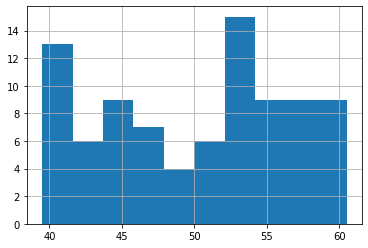

In [ ]:
#Distribución índice de Gini
df_final['Índice de Gini'].hist()

## CONSIGNAS

#### Preparación de los datos

1. Agregar la información de ARGENTINA al dataset anterior en base a lo obtenido en el Práctico de Análisis y Curación.
2. Convertir la columna Country en una variable dummy y codificar la columna Year (Los siguientes links pueden ser útiles: [Link1](https://chrisalbon.com/python/data_wrangling/pandas_convert_categorical_to_dummies/), [Link2](https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159), [Link3](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)). 
3. Construir un segundo dataset con **datos normalizados/estandarizados** usando *StandardScaler* o *MinMaxScaler* de la librería scikit-learn por ejemplo. En este punto se debe **investigar** acerca de cómo encarar un proceso de normalización/estandarización ante la presencia de variables dummies, columnas con label encoder y columnas con valores numéricos, como es el caso del dataset en consideración. Además, sería interesante ver el efecto del procesamiento aplicado sobre la distribución de los datos de forma similar a lo realizado en este [post](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).


In [ ]:
# Carga del dataset en formato long
dataset_ARG = pd.read_csv(BASE_DIR+'dataset_ARG_1990_2018.csv')

In [ ]:
dataset_ARG.head()

,Feat,Indi,Pais,CCod,ICod,Year,Value
0,Población entre 15 y 64 años de edad (% del total),Education,Argentina,ARG,SP.POP.1564.TO.ZS,1990,6.029160e+01
1,Población entre 0 y 14 años de edad (% del total),Education,Argentina,ARG,SP.POP.0014.TO.ZS,1990,3.078601e+01
2,"Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)",Education,Argentina,ARG,SL.UEM.TOTL.MA.ZS,1990,5.236000e+00
3,"Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)",Education,Argentina,ARG,SL.UEM.TOTL.FE.ZS,1990,5.747000e+00
4,"Población activa, total",Education,Argentina,ARG,SL.TLF.TOTL.IN,1990,1.358077e+07


In [ ]:
all_icods = variables_educacion + variables_proteccionsocial + codigos_indicadores_pobreza

In [ ]:
# Filtrado por Features de interés

dataset_ARG = dataset_ARG[dataset_ARG.ICod.isin(all_icods)]

In [ ]:
dataset_ARG.Feat.unique()

array(['Población activa, total', 'Índice de Gini',
       'Brecha de pobreza a $1,90 por día (2011 PPA) (%)',
       'Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)',
       'Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)'],
      dtype=object)

In [ ]:
# Eliminamos la columna "Pais"
dataset_ARG.drop("Pais", axis = 1, inplace = True)

In [ ]:
dataset_ARG.head()

,Feat,Indi,CCod,ICod,Year,Value
4,"Población activa, total",Education,ARG,SL.TLF.TOTL.IN,1990,1.358077e+07
64,Índice de Gini,Poverty,ARG,SI.POV.GINI,1990,4.642500e+01
65,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)",Poverty,ARG,SI.POV.GAPS,1990,5.250000e-01
66,"Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Poverty,ARG,SI.POV.DDAY,1990,8.250000e-01
74,"Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Social_protection,ARG,SL.UEM.TOTL.NE.ZS,1990,7.060000e+00


In [ ]:
# Disponemos del dataframe en el formato objetivo
dataset_ARG_pivot = pd.pivot(dataset_ARG, columns="Feat", values = "Value", index = "Year")
dataset_ARG_pivot["Country"] = "ARG"
dataset_ARG_pivot = dataset_ARG_pivot.reset_index()

In [ ]:
dataset_ARG_pivot.head()

Feat,Year,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)","Población activa, total","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)",Índice de Gini,Country
0,1990,0.525,7.06,13580769.0,0.825,46.425,ARG
1,1991,0.700,5.44,13858142.0,1.100,46.800,ARG
2,1992,1.200,6.36,14149418.0,2.100,45.500,ARG
3,1993,1.200,10.10,14466817.0,2.400,44.900,ARG
4,1994,1.500,11.76,14760835.0,2.300,45.900,ARG


In [ ]:
# Transformamos la columna Year a formato integer, en el df que no incluye Argentina
df_final.Year = pd.to_numeric(df_final.Year, downcast="integer")

In [ ]:
# Transformamos la columna Year a formato integer, en el df de Argentina
dataset_ARG_pivot.Year = pd.to_numeric(dataset_ARG_pivot.Year, downcast="integer")

In [ ]:
# Agregamos a Argentina al dataset con el resto de los países
original_df = pd.concat([df_final, dataset_ARG_pivot])

In [ ]:
original_df

,Year,"Población activa, total",Country,Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)"
0,1990,1.7066e+06,PAR,40.8,0.3,1.2,5.8
1,1991,1.75702e+06,PAR,44.28,1.3,3.44,5.1
2,1992,1.80544e+06,PAR,47.76,2.3,5.68,4.98
3,1993,1.86062e+06,PAR,51.24,3.3,7.92,5.06
4,1994,1.9188e+06,PAR,54.72,4.3,10.16,4.41
...,...,...,...,...,...,...,...
24,2014,1.90093e+07,ARG,41.7,0.3,0.7,7.2676
25,2015,1.93605e+07,ARG,41.85,0.3,0.7,7.62753
26,2016,1.96965e+07,ARG,42,0.3,0.7,7.98747
27,2017,2.00353e+07,ARG,41.2,0.2,0.5,8.3474


In [ ]:
# Creamos una nueva tabla, para conservar la original
data = original_df.copy()

In [ ]:
# Hacemos dummy a la columna Country
data = pd.get_dummies(data, columns=['Country'])

In [ ]:
data.head()

,Year,"Población activa, total",Índice de Gini,"Brecha de pobreza a $1,90 por día (2011 PPA) (%)","Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)","Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)",Country_ARG,Country_BRA,Country_PAR,Country_URU
0,1990,1.7066e+06,40.8,0.3,1.2,5.8,0,0,1,0
1,1991,1.75702e+06,44.28,1.3,3.44,5.1,0,0,1,0
2,1992,1.80544e+06,47.76,2.3,5.68,4.98,0,0,1,0
3,1993,1.86062e+06,51.24,3.3,7.92,5.06,0,0,1,0
4,1994,1.9188e+06,54.72,4.3,10.16,4.41,0,0,1,0


In [ ]:
# Codificamos la columna Year, nominalmente
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

In [ ]:
tmp_year = asarray(data.Year).reshape(-1, 1)

In [ ]:
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(tmp_year)

In [ ]:
# lo asignamos a la columna year
data.Year = result

In [ ]:
# Cambiamos los nombres de las columnas, quitamos tildes, símbolos raros y espacios
data.columns = ['Year', 'Poblacion_activa_total', 'Indice_de_Gini',
       'Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc',
       'Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion',
       'Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional',
       'Country_ARG', 'Country_BRA', 'Country_PAR', 'Country_URU']

In [ ]:
data.head()

,Year,Poblacion_activa_total,Indice_de_Gini,Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc,Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion,Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional,Country_ARG,Country_BRA,Country_PAR,Country_URU
0,0.0,1.7066e+06,40.8,0.3,1.2,5.8,0,0,1,0
1,1.0,1.75702e+06,44.28,1.3,3.44,5.1,0,0,1,0
2,2.0,1.80544e+06,47.76,2.3,5.68,4.98,0,0,1,0
3,3.0,1.86062e+06,51.24,3.3,7.92,5.06,0,0,1,0
4,4.0,1.9188e+06,54.72,4.3,10.16,4.41,0,0,1,0


In [ ]:
# Veamos los tipos de datos por columna
data.dtypes

Year                                                                                      float64
Poblacion_activa_total                                                                    object 
Indice_de_Gini                                                                            object 
Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc                                            object 
Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion    object 
Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional      object 
Country_ARG                                                                               uint8  
Country_BRA                                                                               uint8  
Country_PAR                                                                               uint8  
Country_URU                                                                               uint8  
dtype: object

In [ ]:
# Transformaremos las columnas que son objetos, en floats
data["Poblacion_activa_total"] = pd.to_numeric(data["Poblacion_activa_total"])
data["Indice_de_Gini"] = pd.to_numeric(data["Indice_de_Gini"])
data["Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc"] = pd.to_numeric(data["Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc"])
data["Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion"] = pd.to_numeric(data["Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion"])
data["Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional"] = pd.to_numeric(data["Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional"])

In [ ]:
data.dtypes

Year                                                                                      float64
Poblacion_activa_total                                                                    float64
Indice_de_Gini                                                                            float64
Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc                                            float64
Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion    float64
Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional      float64
Country_ARG                                                                               uint8  
Country_BRA                                                                               uint8  
Country_PAR                                                                               uint8  
Country_URU                                                                               uint8  
dtype: object

In [ ]:
# MinMaxScaler para el escalado de las Features
# Los variables dummy, dada su naturaleza de 0 y 1, mantienen esos valores
# La variable Year, al ser ordinal, los nuevos valores mantienen el orden original, pero entre 0 y 1
from sklearn import preprocessing

In [ ]:
# Generamos un df con las variables escaladas
mm_scaler = preprocessing.MinMaxScaler()
data_mm = mm_scaler.fit_transform(data)

In [ ]:
data_mm = pd.DataFrame(data_mm, columns=data.columns)

In [ ]:
data_mm

,Year,Poblacion_activa_total,Indice_de_Gini,Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc,Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion,Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional,Country_ARG,Country_BRA,Country_PAR,Country_URU
0,0.000000,0.003077,0.061905,0.032967,0.051163,0.148240,0.0,0.0,1.0,0.0
1,0.035714,0.003561,0.227619,0.142857,0.155349,0.105003,0.0,0.0,1.0,0.0
2,0.071429,0.004026,0.393333,0.252747,0.259535,0.097591,0.0,0.0,1.0,0.0
3,0.107143,0.004555,0.559048,0.362637,0.363721,0.102532,0.0,0.0,1.0,0.0
4,0.142857,0.005114,0.724762,0.472527,0.467907,0.062384,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
111,0.857143,0.169199,0.104762,0.032967,0.027907,0.238888,1.0,0.0,0.0,0.0
112,0.892857,0.172572,0.111905,0.032967,0.027907,0.261120,1.0,0.0,0.0,0.0
113,0.928571,0.175797,0.119048,0.032967,0.027907,0.283352,1.0,0.0,0.0,0.0
114,0.964286,0.179050,0.080952,0.021978,0.018605,0.305584,1.0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['Year', 'Poblacion_activa_total', 'Indice_de_Gini',
       'Brecha_de_pobreza_a_1.90_por_dia_2011_PPA_perc',
       'Tasa_de_incidencia_de_la_pobreza_sobre_la_base_de_1.90_por_dia_2011_PPA_perc_poblacion',
       'Desempleo_total_perc_de_participacion_total_en_la_fuerza_laboral_estimacion_nacional',
       'Country_ARG', 'Country_BRA', 'Country_PAR', 'Country_URU'],
      dtype='object')

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import numpy as np

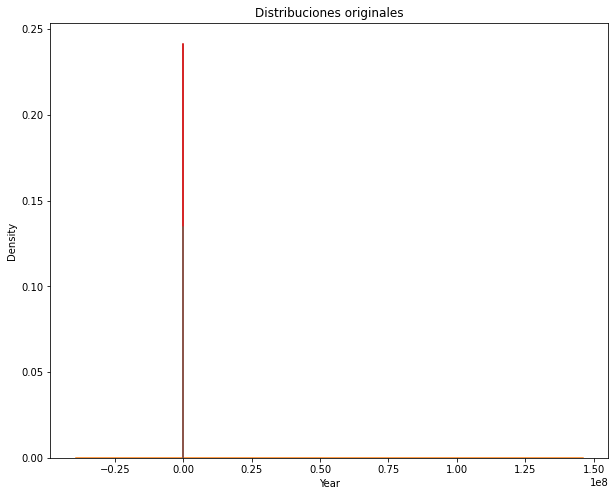

In [ ]:
# Veamos las distribuciones de las variables sin escalado
# Sin plotear las variables dummies
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribuciones originales')

seaborn.kdeplot(data.iloc[:,0], ax=ax1)
seaborn.kdeplot(data.iloc[:,1], ax=ax1)
seaborn.kdeplot(data.iloc[:,2], ax=ax1)
seaborn.kdeplot(data.iloc[:,3], ax=ax1)
seaborn.kdeplot(data.iloc[:,4], ax=ax1)
seaborn.kdeplot(data.iloc[:,5], ax=ax1)

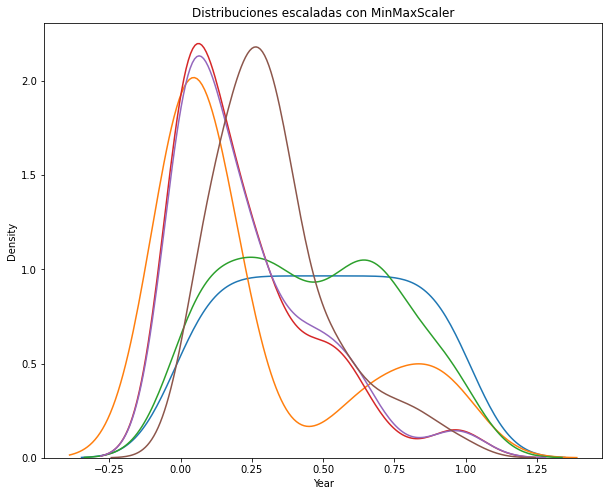

In [ ]:
# Veamos las distribuciones de las variables con escalado
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Distribuciones escaladas con MinMaxScaler')

seaborn.kdeplot(data_mm.iloc[:,0], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,1], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,2], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,3], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,4], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,5], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,6], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,7], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,8], ax=ax1)
seaborn.kdeplot(data_mm.iloc[:,9], ax=ax1)


#### Modelado

## Parte I

Una parte esencial del proceso de modelado (y en realidad de todo experimento científico) es llevar a cabo un *seguimiento* de todas las pruebas realizadas de manera tal de no "perder resultados" (con la consecuencia de tener que repetir experimentos ya realizados) y poder llevar un registro de que tanto se mejoró/empeoró. 

Para llevar a cabo esto disponemos de una herramienta llamada [mlflow](https://mlflow.org/) que nos permite llevar el trackeo de todo el proceso de una manera simple y rápida, además de poder guardar información que consideremos relevante. Así, la primer consigna de esta sección es **entender y setear la herramienta, instalando mlflow si es necesario, de manera tal que todo experimento que se pruebe a partir de este momento quede registrado y pueda recuperarse**. En este [link](https://github.com/PiConsulting/Pensadero/tree/master/Eventos/2020/2020-03-06_wids_mlflow) encontrarán una implementación simple con mflow de la cual pueden guiarse.

## Respuesta. Parte I
Decidimos integrar esta parte con cada modelo, por lo que se podrá encontrar la implementación de **mlflow** en la sección correspondiente a cada modelo ensayado en la **PARTE II**

## Parte II


1. Realizar la partición del dataset en conjunto de entrenamiento y test. ¿Son las distribuciones de los datos similares en ambos conjuntos? Si la respuesta es no, ¿qué decisión tomarían?.
2. Probar modelos de *regresión lineal* y *polinomial* (elegir al menos dos grados diferentes) sobre los **datos sin normalizar**. ¿Cómo son los errores sobre el conjunto de entrenamiento y sobre el conjunto de test? Analizar los resultados.
3. Probar algún modelo del tipo *árbol de decisión/random forest* para problemas de regresión también sobre los **datos sin normalizar**. Extraer y estudiar el feature importance. Análizar la performance de estos modelos y comparar con los resultados del punto 2 (**Sabemos que esto va a dar muy mal por la poca cantidad de datos!**).
4. Repetir los pasos 2 y 3 sobre el **dataset normalizado**: ¿Cambian los resultados? ¿Se observa alguna diferencia en performance? ¿Algo para destacar?.
5. A modo de práctica recuperar algún resultado usando mlflow. Nota: Se recomienda guardar las métricas obtenidas, modelos, tipo de algoritmo probado (y por qué no los dataset usados). 
6. Escribir conclusiones finales analizando los problemas al momento de modelar un dataset reducido (¿Qué rol cumple el overfitting en este caso?)

## Respuestas. Parte II

### Modelos con el dataset no escalado

#### Partición del dataset

In [ ]:
# Separamos la variable objetivo, Indice_de_Gini, y la eliminamos del dataframe
y = data.Indice_de_Gini
X = data.drop("Indice_de_Gini", axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

In [ ]:
def histograms_plot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(10,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax)
        tit = feature
        tit = (tit[:15] + '..') if len(tit) > 15 else tit
        ax.set_title(tit)
    fig.tight_layout()  
    plt.show()

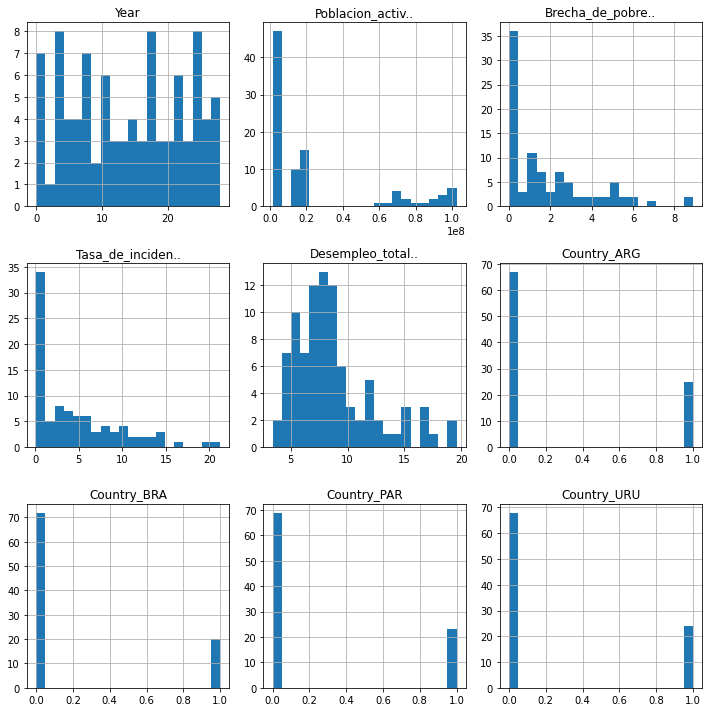

In [ ]:
histograms_plot(X_train, X_train.columns, 3, 3)

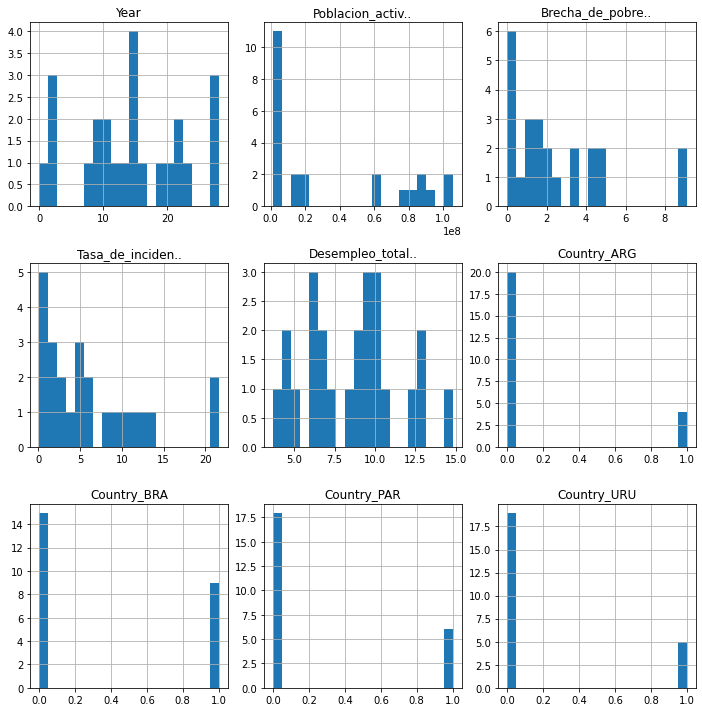

In [ ]:
histograms_plot(X_test, X_test.columns, 3, 3)

En general, se observa que las distribuciones de los atributos para los sets de train y test son muy similares, por lo que en este sentido no habría problema en la aplicación de los modelos de Aprendizaje Supervisado. 

### Modelos

##### **Árbol de decisión (regresión)**

A continuación, se construye un árbol de decisión para modelar una regresión. Para ello, se utiliza la función DecisionTreeRegressor. Lo primero que se hace es crear el experimento **"Arbol_def"** donde guardaremos los resultados de este modelo cambiando sus hiperparámetros. Luego, en la celda siguiente se activa dicho experimento y se corren las diferentes versiones del modelo, guardando los logs correspondientes utilizando **mlflow**.

In [ ]:
import mlflow
import mlflow.sklearn

In [ ]:
# Crear experimento
mlflow.create_experiment(name="Arbol_Dec")

'0'

In [ ]:
# Experimentos cambiando el hiperparámetro "random_state" para el modeo DecisionTreeRegressor (es trivial, pero sirve de prueba de concepto)
mlflow.set_experiment("Arbol_Dec") # Setear el experimento creado como el experimento "activo"

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  

for rs in (13,15,17): # se correran 3 versiones de DTR con esos tres valores para random_state, el subfijo "_NS" hace rreferncia a los datos No Escalados
  with mlflow.start_run(run_name="DTR_NS_rs="+str(rs),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    rd_st = rs # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
        
    dt = DecisionTreeRegressor(random_state = rd_st) # definimos el modelo
    dt.fit(X_train, y_train) # entrenamos
    
    mlflow.log_param('_tipo_algoritmo','DecisionTreeRegressor') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(dt.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    y_train_pred = dt.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    y_test_pred = dt.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
    
    score_train = dt.score(X_train, y_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = dt.score(X_test, y_test) # guardamos temporalmente los scores para test en la corrida en curso
    
    mse_train = mean_squared_error(y_train, y_train_pred) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, y_test_pred) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de DTR p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de DTR p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica MSE obtenida de DTR p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica MSE obtenida de DTR p/test en la corrida en curso
    

    # Como solo hacemos 3 experimentos imprimimos los resultados para rápida comparación (contemplar NO hacer esto si se ensayaran muchas versiones del modelo)
    print('Param_set (rand_state): {}'.format(rd_st))
    print('Score_train: {:.3f}'.format(score_train))
    print('Score_test: {:.3f}'.format(score_test))
    print('MSE_train: {:.3f}'.format(mse_train))
    print('MSE_test: {:.3f}'.format(mse_test))
    print('\n')
    mlflow.end_run()

Param_set (rand_state): 13
Score_train: 1.000
Score_test: 0.845
MSE_train: 0.000
MSE_test: 5.408


Param_set (rand_state): 15
Score_train: 1.000
Score_test: 0.844
MSE_train: 0.000
MSE_test: 5.468


Param_set (rand_state): 17
Score_train: 1.000
Score_test: 0.850
MSE_train: 0.000
MSE_test: 5.253




In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>]

In [ ]:
# Ver corridas del experimento activo
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mse_test,metrics.score_test,metrics.score_train,...,params.min_samples_split,params.random_state,params.splitter,params.max_depth,params.ccp_alpha,params.min_samples_leaf,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,759110c2c8c94a8a9fd5c125573a3728,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/759110c2c8c94a8a9fd5c125573a3728/artifacts,2020-10-04 18:47:43.216000+00:00,2020-10-04 18:47:43.235000+00:00,0.0,5.252708,0.849914,1.0,...,2,17,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=17,nico
1,8706af12e33e4cda80ac9b6143a8a631,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/8706af12e33e4cda80ac9b6143a8a631/artifacts,2020-10-04 18:47:43.192000+00:00,2020-10-04 18:47:43.215000+00:00,0.0,5.467708,0.843771,1.0,...,2,15,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=15,nico
2,bd7b86ad73994dc3b0c71f57f949e762,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/bd7b86ad73994dc3b0c71f57f949e762/artifacts,2020-10-04 18:47:43.171000+00:00,2020-10-04 18:47:43.190000+00:00,0.0,5.407630,0.845488,1.0,...,2,13,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=13,nico


##### **Regresiones polinomiales**

A continuación, se construyen regresiones polinomiales de diferentes grados, desde grado 1 (regresión lineal) a grado 7. Se evalúa la performance de los modelos según su score y su error cuadrático medio. Lo primero que se hace es crear el experimento **"Reg_Pol"** donde guardaremos los resultados de este modelo cambiando sus hiperparámetros. Luego, en la celda siguiente se activa dicho experimento y se corren las diferentes versiones del modelo, guardando los logs correspondientes utilizando **mlflow** 

In [ ]:
# Crear experimento
mlflow.create_experiment(name="Reg_Pol")

'1'

In [ ]:
# Experimentos cambiando el hiperparámetro "grado del polinomio" para el modeo PolynomialRegression
mlflow.set_experiment("Reg_Pol") # Setear el experimento creado como el experimento "activo"

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Listas para guardar metricas y luego evaluar resultados de los modelos de acuerdo al grado del polinomio
list_scores_train = []
list_scores_test = []
list_mse_train = []
list_mse_test = []
list_degrees = []

for dg in range(7): # se correran 7 versiones de regresiones polinomoales cambiando el grado del polinomio utilizado, el subfijo "_NS" hace rreferncia a los datos No Escalados
  with mlflow.start_run(run_name="RP_NS_dg="+str(dg+1),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    degree = dg + 1 # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
    
    pol_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # definimos el modelo
    pol_reg.fit(X_train, y_train) # entrenamos

    mlflow.log_param('_tipo_algoritmo','PolynomialRegression') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(pol_reg.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    y_train_pred = pol_reg.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    y_test_pred = pol_reg.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
    
    score_train = pol_reg.score(X_train, y_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = pol_reg.score(X_test, y_test) # guardamos temporalmente los scores para test en la corrida en curso
    
    mse_train = mean_squared_error(y_train, y_train_pred) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, y_test_pred) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de RP p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de RP p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica MSE obtenida de RP p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica MSE obtenida de RP p/test en la corrida en curso

    mlflow.end_run()
    
# Listas para evaluar gráficamente los resultados de los modelos de acuerdo al grado del polinomio
    list_scores_train.append(score_train)
    list_scores_test.append(score_test)
    
    list_mse_train.append(mse_train)
    list_mse_test.append(mse_test)
    
    list_degrees.append(degree)

In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Reg_Pol', tags={}>]

In [ ]:
# Ver corridas del experimento activo
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mse_test,metrics.score_test,metrics.score_train,...,params.steps,params.linearregression__normalize,params.polynomialfeatures,params.linearregression__n_jobs,params.linearregression,params.polynomialfeatures__include_bias,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,e27acd37fcd84c6691a352a75412521b,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/e27acd37fcd84c6691a352a75412521b/artifacts,2020-10-04 18:47:49.449000+00:00,2020-10-04 18:47:49.506000+00:00,18.178744,20.174326,0.423559,0.508847,...,"[('polynomialfeatures', PolynomialFeatures(degree=7)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=7),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=7,nico
1,326ca1b4df614b46a232cab6926e89ff,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/326ca1b4df614b46a232cab6926e89ff/artifacts,2020-10-04 18:47:49.412000+00:00,2020-10-04 18:47:49.448000+00:00,17.508572,18.601449,0.468500,0.526953,...,"[('polynomialfeatures', PolynomialFeatures(degree=6)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=6),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=6,nico
2,50f25b0c19f34d90886243d8a9d015f1,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/50f25b0c19f34d90886243d8a9d015f1/artifacts,2020-10-04 18:47:49.385000+00:00,2020-10-04 18:47:49.411000+00:00,8.877313,9.678242,0.723463,0.760153,...,"[('polynomialfeatures', PolynomialFeatures(degree=5)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=5),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=5,nico
3,bab57a4f5bc14498a4c098e89182cbfc,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/bab57a4f5bc14498a4c098e89182cbfc/artifacts,2020-10-04 18:47:49.363000+00:00,2020-10-04 18:47:49.384000+00:00,7.153671,10.707711,0.694048,0.806722,...,"[('polynomialfeatures', PolynomialFeatures(degree=4)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=4),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=4,nico
4,81206a9636574f8a8401ea93f26bfacc,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/81206a9636574f8a8401ea93f26bfacc/artifacts,2020-10-04 18:47:49.340000+00:00,2020-10-04 18:47:49.362000+00:00,5.717628,5.643736,0.838741,0.845521,...,"[('polynomialfeatures', PolynomialFeatures(degree=3)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=3),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=3,nico
5,8a4a8cc06fa440e9b2d8aab3824be16a,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/8a4a8cc06fa440e9b2d8aab3824be16a/artifacts,2020-10-04 18:47:49.316000+00:00,2020-10-04 18:47:49.338000+00:00,1.005131,5.133044,0.853333,0.972843,...,"[('polynomialfeatures', PolynomialFeatures()), ('linearregression', LinearRegression())]",False,PolynomialFeatures(),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=2,nico
6,76d8d5fc6b2a428b9b7d7084d116ec91,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/76d8d5fc6b2a428b9b7d7084d116ec91/artifacts,2020-10-04 18:47:49.283000+00:00,2020-10-04 18:47:49.314000+00:00,3.675641,5.498471,0.842892,0.900692,...,"[('polynomialfeatures', PolynomialFeatures(degree=1)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=1),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_NS_dg=1,nico


In [ ]:
reg_results = { 'degree': list_degrees, 'score_train': list_scores_train, 'score_test': list_scores_test, 'mse_train': list_mse_train, 'mse_test': list_mse_test } 
  
df_reg_results = pd.DataFrame(reg_results)
df_reg_results

,degree,score_train,score_test,mse_train,mse_test
0,1,0.900692,0.842892,3.675641,5.498471
1,2,0.972843,0.853333,1.005131,5.133044
2,3,0.845521,0.838741,5.717628,5.643736
3,4,0.806722,0.694048,7.153671,10.707711
4,5,0.760153,0.723463,8.877313,9.678242
5,6,0.526953,0.468500,17.508572,18.601449
6,7,0.508847,0.423559,18.178744,20.174326


Text(0.5, 1.0, 'Scores para regresiones polinomiales, según su grado')

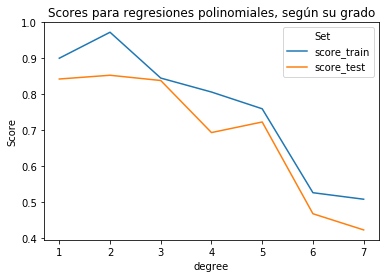

In [ ]:
tmp_df = pd.melt(df_reg_results, id_vars="degree", value_vars=["score_train", "score_test"], value_name="Score", var_name="Set")
seaborn.lineplot(x="degree", y="Score", hue = "Set", data=tmp_df)
plt.title("Scores para regresiones polinomiales, según su grado")

Text(0.5, 1.0, 'ECM para regresiones polinomiales, según su grado')

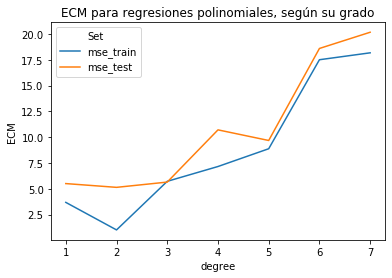

In [ ]:
tmp_df = pd.melt(df_reg_results, id_vars="degree", value_vars=["mse_train", "mse_test"], value_name="ECM", var_name="Set")
seaborn.lineplot(x="degree", y="ECM", hue = "Set", data=tmp_df)
plt.title("ECM para regresiones polinomiales, según su grado")

##### **Random Forest**

A continuación, utilizamos el modelo Random Forest. Lo primero que se hace es crear el experimento **"Rand_For"** donde guardaremos los resultados de este modelo cambiando sus hiperparámetros. Luego, en la celda siguiente se activa dicho experimento y se corren las diferentes versiones del modelo, guardando los logs correspondientes utilizando **mlflow** 

In [ ]:
# Crear experimento
mlflow.create_experiment(name="Rand_For")

'2'

In [ ]:
# Experimentos cambiando el hiperparámetro "criterio", que defije la función de calidad para definir una partición
mlflow.set_experiment("Rand_For") # Setear el experimento creado como el experimento "activo"

from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for cr in ("mse","mae"): # se correran 2 versiones de RF con diferentes criterios de calidad, el subfijo "_NS" hace rreferncia a los datos No Escalados
  with mlflow.start_run(run_name="RF_NS_cr="+str(cr),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    q_crit = cr # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
    
    rf = ensemble.RandomForestRegressor(criterion= q_crit, random_state=0) # definimos el modelo
    rf.fit(X_train, y_train) # entrenamos
    
    mlflow.log_param('_tipo_algoritmo','RandomForestRegressor') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(rf.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    pred_train = rf.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    pred_test = rf.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
     
    score_train = rf.score(X_train, pred_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = rf.score(X_test, pred_test) # guardamos temporalmente los scores para train en la corrida en curso
    
    mse_train = mean_squared_error(y_train, pred_train) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, pred_test) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mae_train = mean_absolute_error(y_train, pred_train) # evaluamos el EMA para test, guardamos temporalmente para la corrida en curso
    mae_test = mean_absolute_error(y_test, pred_test) # evaluamos el EMA para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de RF p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica ECM obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica ECM obtenida de RF p/test en la corrida en curso
    mlflow.log_metric('mae_train', mae_train) # Loggeamos la métrica EMA obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('mae_test', mae_test) # Loggeamos la métrica EMA obtenida de RF p/test en la corrida en curso

    
# Como solo hacemos 2 experimentos imprimimos los resultados para rápida comparación (contemplar NO hacer esto si se ensayaran muchas versiones del modelo)
    print('Param_set (q_criterion): {}'.format(q_crit))
    print('Score_train: {:.3f}'.format(score_train))
    print('Score_test: {:.3f}'.format(score_test))
    print('MSE_train: {:.3f}'.format(mse_train))
    print('MSE_test: {:.3f}'.format(mse_test))
    print('MAE_train: {:.3f}'.format(mae_train))
    print('MAE_test: {:.3f}'.format(mae_test))
    print('\n')
    
    mlflow.end_run()

Param_set (q_criterion): mse
Score_train: 1.000
Score_test: 1.000
MSE_train: 0.344
MSE_test: 3.169
MAE_train: 0.434
MAE_test: 1.183


Param_set (q_criterion): mae
Score_train: 1.000
Score_test: 1.000
MSE_train: 0.369
MSE_test: 2.846
MAE_train: 0.443
MAE_test: 1.139




In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Reg_Pol', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/2', experiment_id='2', lifecycle_stage='active', name='Rand_For', tags={}>]

In [ ]:
# Ver corridas del experimento activo
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mae_train,metrics.score_train,metrics.mse_test,...,params.min_impurity_split,params.min_samples_split,params.random_state,params.oob_score,params.max_depth,params.ccp_alpha,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,9431d3cbedd448bf9795bde57868fb17,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/9431d3cbedd448bf9795bde57868fb17/artifacts,2020-10-04 18:48:00.400000+00:00,2020-10-04 18:48:00.576000+00:00,0.369227,0.442908,1.0,2.845740,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_NS_cr=mae,nico
1,3b5c316802084c18beb35a191f1a9570,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/3b5c316802084c18beb35a191f1a9570/artifacts,2020-10-04 18:48:00.244000+00:00,2020-10-04 18:48:00.399000+00:00,0.343835,0.434424,1.0,3.168676,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_NS_cr=mse,nico


#### Análisis

Para cada modelo, se obtuvo el score y el error cuadrático medio. En el caso de regresiones, o árboles de decision regresores, el score hace referencia al coeficiente de determinación (R-cuadrado). Este parámetro adquiere valores entre 0 y 1, siendo los valores cercanos a 1 modelos de mejor calidad, y que mejor reflejan los datos estudiados. El error cuadrático medio, refleja la diferencia entre los datos estudiados y los estimados mediante el modelo. Mientras más bajo, mejor es el modelo.


Entre las regresiones polinomiales, se observa que el modelo que mejor explica los datos del set de test es una regresión polinomial de grado 2. Esta obtuvo el mejor score del set de test entre las diferentes regresiones (85%) y un error cuadrático medio bajo (5.1). Es de destacar también la performance de la regresión lineal simple, la cual fue muy similar a la regresión polinomial de grado 2.

El árbol de decisión para en el modo de regresión también obtuvo una performance bastant buena, pero sin superar a la regresión polinomial de grado 2.

El modelo de RandomForest, obtuvo la mejor performance entre todos los modelos analizados, con un score del set de test de prácticamente 100%. 

### Modelos con el dataset escalado con MinMaxScaler

#### Partición del dataset

In [ ]:
# Separamos la variable objetivo, Indice_de_Gini, y la eliminamos del dataframe
y = data_mm.Indice_de_Gini
X = data_mm.drop("Indice_de_Gini", axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

In [ ]:
#X_train.hist()

In [ ]:
#X_test.hist()

In [ ]:
#seaborn.displot(x=y_train, stat="density"), seaborn.displot(x=y_test, stat="density")

#### Modelos

##### **Regresiones polinomiales**

A continuación, se construyen regresiones polinomiales de diferentes grados. Se evalúa la performance de los modelos según su score y su error cuadrático medio. Al respecto de **mlflow**, ver descripción del modelo en la sección correspondiente a los modelos con el dataset no escalado.

In [ ]:
# Experimentos cambiando el hiperparámetro "grado del polinomio" para el modeo PolynomialRegression
mlflow.set_experiment("Reg_Pol") # Setear el experimento creado como el experimento "activo"

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Listas para guardar metricas y luego evaluar resultados de los modelos de acuerdo al grado del polinomio
list_scores_train = []
list_scores_test = []
list_mse_train = []
list_mse_test = []
list_degrees = []

for dg in range(7): # se correran 7 versiones de RP cambiando el grado del polinomio utilizado, el subfijo "_SC" hace referencia a los datos Escalados
  with mlflow.start_run(run_name="RP_SC_dg="+str(dg+1),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    degree = dg + 1 # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
    
    pol_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # definimos el modelo
    pol_reg.fit(X_train, y_train) # entrenamos

    mlflow.log_param('_tipo_algoritmo','PolynomialRegression') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(pol_reg.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    y_train_pred = pol_reg.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    y_test_pred = pol_reg.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
    
    score_train = pol_reg.score(X_train, y_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = pol_reg.score(X_test, y_test) # guardamos temporalmente los scores para test en la corrida en curso
    
    mse_train = mean_squared_error(y_train, y_train_pred) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, y_test_pred) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de RP p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de RP p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica MSE obtenida de RP p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica MSE obtenida de RP p/test en la corrida en curso

    mlflow.end_run()
    
# Listas para evaluar gráficamente los resultados de los modelos de acuerdo al grado del polinomio
    list_scores_train.append(score_train)
    list_scores_test.append(score_test)
    
    list_mse_train.append(mse_train)
    list_mse_test.append(mse_test)
    
    list_degrees.append(degree)

In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Reg_Pol', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/2', experiment_id='2', lifecycle_stage='active', name='Rand_For', tags={}>]

In [ ]:
# Ver corridas del experimento activo # Ahora se incluyen los de datos no escalados y escalados bajo Reg_Pol
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mse_test,metrics.score_test,metrics.score_train,...,params.steps,params.linearregression__normalize,params.polynomialfeatures,params.linearregression__n_jobs,params.linearregression,params.polynomialfeatures__include_bias,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,3110644506374453b9dde26a09d7e4d5,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/3110644506374453b9dde26a09d7e4d5/artifacts,2020-10-04 18:48:24.963000+00:00,2020-10-04 18:48:25.020000+00:00,6.643752e-28,0.077918,0.018179,1.000000,...,"[('polynomialfeatures', PolynomialFeatures(degree=7)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=7),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=7,nico
1,5ea8ea3906254422b490f0ea0df0f890,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/5ea8ea3906254422b490f0ea0df0f890/artifacts,2020-10-04 18:48:24.926000+00:00,2020-10-04 18:48:24.962000+00:00,7.939219e-27,0.089146,-0.123305,1.000000,...,"[('polynomialfeatures', PolynomialFeatures(degree=6)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=6),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=6,nico
2,c47a0f3c17f545c19b73222f077fdd15,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/c47a0f3c17f545c19b73222f077fdd15/artifacts,2020-10-04 18:48:24.900000+00:00,2020-10-04 18:48:24.925000+00:00,1.803082e-27,0.086349,-0.088058,1.000000,...,"[('polynomialfeatures', PolynomialFeatures(degree=5)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=5),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=5,nico
3,e3d7d8e8c7d246e3acfce5d152264773,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/e3d7d8e8c7d246e3acfce5d152264773/artifacts,2020-10-04 18:48:24.878000+00:00,2020-10-04 18:48:24.899000+00:00,7.290693e-28,0.298282,-2.758562,1.000000,...,"[('polynomialfeatures', PolynomialFeatures(degree=4)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=4),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=4,nico
4,7be8ba233aa145a380c9e87a11f487c5,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/7be8ba233aa145a380c9e87a11f487c5/artifacts,2020-10-04 18:48:24.856000+00:00,2020-10-04 18:48:24.877000+00:00,3.250461e-25,47.387563,-596.116464,1.000000,...,"[('polynomialfeatures', PolynomialFeatures(degree=3)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=3),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=3,nico
5,a34b624c7a1043f0b431651f0bd2955b,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/a34b624c7a1043f0b431651f0bd2955b/artifacts,2020-10-04 18:48:24.833000+00:00,2020-10-04 18:48:24.854000+00:00,3.675568e-03,0.019613,0.752859,0.956206,...,"[('polynomialfeatures', PolynomialFeatures()), ('linearregression', LinearRegression())]",False,PolynomialFeatures(),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=2,nico
6,c4e19f8378af4a7091990078eaece633,1,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/1/c4e19f8378af4a7091990078eaece633/artifacts,2020-10-04 18:48:24.810000+00:00,2020-10-04 18:48:24.832000+00:00,8.334786e-03,0.012468,0.842892,0.900692,...,"[('polynomialfeatures', PolynomialFeatures(degree=1)), ('linearregression', LinearRegression())]",False,PolynomialFeatures(degree=1),None,LinearRegression(),True,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RP_SC_dg=1,nico
7,e27acd37fcd84c6691a35

In [ ]:
reg_results = { 'degree': list_degrees, 'score_train': list_scores_train, 'score_test': list_scores_test, 'mse_train': list_mse_train, 'mse_test': list_mse_test } 
  
df_reg_results = pd.DataFrame(reg_results)
df_reg_results

,degree,score_train,score_test,mse_train,mse_test
0,1,0.900692,0.842892,8.334786e-03,0.012468
1,2,0.956206,0.752859,3.675568e-03,0.019613
2,3,1.000000,-596.116464,3.250461e-25,47.387563
3,4,1.000000,-2.758562,7.290693e-28,0.298282
4,5,1.000000,-0.088058,1.803082e-27,0.086349
5,6,1.000000,-0.123305,7.939219e-27,0.089146
6,7,1.000000,0.018179,6.643752e-28,0.077918


Se observa un comportamiento anormal para la regresión polinomial de grado 3. La eliminarmos de la tabla para poder analizar los gráficos de manera adecuada.

In [ ]:
df_reg_results = df_reg_results.drop(labels=2, axis = 0)
df_reg_results

,degree,score_train,score_test,mse_train,mse_test
0,1,0.900692,0.842892,8.334786e-03,0.012468
1,2,0.956206,0.752859,3.675568e-03,0.019613
3,4,1.000000,-2.758562,7.290693e-28,0.298282
4,5,1.000000,-0.088058,1.803082e-27,0.086349
5,6,1.000000,-0.123305,7.939219e-27,0.089146
6,7,1.000000,0.018179,6.643752e-28,0.077918


Text(0.5, 1.0, 'Scores para regresiones polinomiales, según su grado')

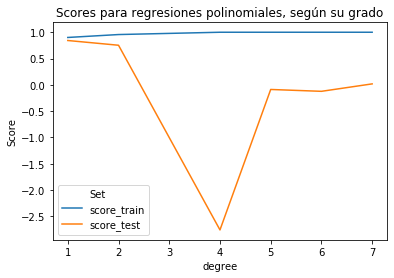

In [ ]:
tmp_df = pd.melt(df_reg_results, id_vars="degree", value_vars=["score_train", "score_test"], value_name="Score", var_name="Set")
seaborn.lineplot(x="degree", y="Score", hue = "Set", data=tmp_df)
plt.title("Scores para regresiones polinomiales, según su grado")

Text(0.5, 1.0, 'ECM para regresiones polinomiales, según su grado')

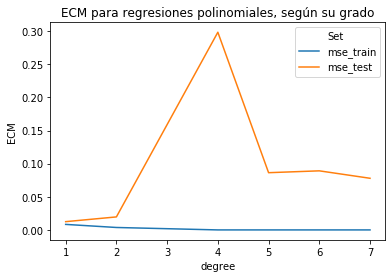

In [ ]:
tmp_df = pd.melt(df_reg_results, id_vars="degree", value_vars=["mse_train", "mse_test"], value_name="ECM", var_name="Set")
seaborn.lineplot(x="degree", y="ECM", hue = "Set", data=tmp_df)
plt.title("ECM para regresiones polinomiales, según su grado")

##### **Árbol de decisión (regresión)**

A continuación, se construye un árbol de decisión para modelar una regresión. Para ello, se utiliza la función DecisionTreeRegressor. Al respecto de **mlflow**, ver descripción dle modelo en la sección correspondiente a los modelos con el dataset no escalado.

In [ ]:
# Experimentos cambiando el hiperparámetro "random_state" para el modeo DecisionTreeRegressor (es trivial, pero sirve de prueba de concepto)
mlflow.set_experiment("Arbol_Dec") # Setear el experimento previamente creado como el experimento "activo"

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  

for rs in (13,15,17): # se correran 3 versiones de DTR con esos tres valores para random_state, el subfijo "_SC" hace referencia a los datos Escalados
  with mlflow.start_run(run_name="DTR_SC_rs="+str(rs),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    rd_st = rs # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
        
    dt = DecisionTreeRegressor(random_state = rd_st) # definimos el modelo
    dt.fit(X_train, y_train) # entrenamos
    
    mlflow.log_param('_tipo_algoritmo','DecisionTreeRegressor') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(dt.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    y_train_pred = dt.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    y_test_pred = dt.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
    
    score_train = dt.score(X_train, y_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = dt.score(X_test, y_test) # guardamos temporalmente los scores para test en la corrida en curso
    
    mse_train = mean_squared_error(y_train, y_train_pred) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, y_test_pred) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de DTR p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de DTR p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica MSE obtenida de DTR p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica MSE obtenida de DTR p/test en la corrida en curso
    

    # Como solo hacemos 3 experimentos imprimimos los resultados para rápida comparación (contemplar NO hacer esto si se ensayaran muchas versiones del modelo)
    print('Param_set (rand_state): {}'.format(rd_st))
    print('Score_train: {:.3f}'.format(score_train))
    print('Score_test: {:.3f}'.format(score_test))
    print('MSE_train: {:.3f}'.format(mse_train))
    print('MSE_test: {:.3f}'.format(mse_test))
    print('\n')

    mlflow.end_run()

Param_set (rand_state): 13
Score_train: 1.000
Score_test: 0.811
MSE_train: 0.000
MSE_test: 0.015


Param_set (rand_state): 15
Score_train: 1.000
Score_test: 0.845
MSE_train: 0.000
MSE_test: 0.012


Param_set (rand_state): 17
Score_train: 1.000
Score_test: 0.808
MSE_train: 0.000
MSE_test: 0.015




In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Reg_Pol', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/2', experiment_id='2', lifecycle_stage='active', name='Rand_For', tags={}>]

In [ ]:
# Ver corridas del experimento activo # Ahora se incluyen los de datos no escalados y escalados bajo Arbol_Dec
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mse_test,metrics.score_test,metrics.score_train,...,params.min_samples_split,params.random_state,params.splitter,params.max_depth,params.ccp_alpha,params.min_samples_leaf,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,5b07e55e4902443e927243d5fa5e2d8e,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/5b07e55e4902443e927243d5fa5e2d8e/artifacts,2020-10-04 18:49:04.569000+00:00,2020-10-04 18:49:04.589000+00:00,0.0,0.015209,0.808355,1.0,...,2,17,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_SC_rs=17,nico
1,333512eaaadc4f0c9f115458d8809aa5,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/333512eaaadc4f0c9f115458d8809aa5/artifacts,2020-10-04 18:49:04.545000+00:00,2020-10-04 18:49:04.568000+00:00,0.0,0.012267,0.845426,1.0,...,2,15,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_SC_rs=15,nico
2,a117c8e911804ecbbe10aabe433d9591,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/a117c8e911804ecbbe10aabe433d9591/artifacts,2020-10-04 18:49:04.524000+00:00,2020-10-04 18:49:04.542000+00:00,0.0,0.015019,0.810745,1.0,...,2,13,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_SC_rs=13,nico
3,759110c2c8c94a8a9fd5c125573a3728,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/759110c2c8c94a8a9fd5c125573a3728/artifacts,2020-10-04 18:47:43.216000+00:00,2020-10-04 18:47:43.235000+00:00,0.0,5.252708,0.849914,1.0,...,2,17,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=17,nico
4,8706af12e33e4cda80ac9b6143a8a631,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/8706af12e33e4cda80ac9b6143a8a631/artifacts,2020-10-04 18:47:43.192000+00:00,2020-10-04 18:47:43.215000+00:00,0.0,5.467708,0.843771,1.0,...,2,15,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=15,nico
5,bd7b86ad73994dc3b0c71f57f949e762,0,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/0/bd7b86ad73994dc3b0c71f57f949e762/artifacts,2020-10-04 18:47:43.171000+00:00,2020-10-04 18:47:43.190000+00:00,0.0,5.407630,0.845488,1.0,...,2,13,best,None,0.0,1,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,DTR_NS_rs=13,nico


##### **Random Forest**

A continuación, utilizamos el modelo Random Forest. Al respecto de **mlflow**, ver descripción dle modelo en la sección correspondiente a los modelos con el dataset no escalado.

In [ ]:
# Experimentos cambiando el hiperparámetro "criterio", que defije la función de calidad para definir una partición
mlflow.set_experiment("Rand_For") # Setear el experimento creado como el experimento "activo"

from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

for cr in ("mse","mae"): # se correran 2 versiones de RF con diferentes criterios de calidad, el subfijo "_SC" hace rreferncia a los datos No Escalados
  with mlflow.start_run(run_name="RF_SC_cr="+str(cr),nested=True): # dado que solo se cambia ese hiperparámetro, se identifica la corrida con su valor para su fácil reconocimiento posterior
    
    q_crit = cr # aquí se almacena el valor del hiperparámetro para cada corrida del modelo
    
    rf = ensemble.RandomForestRegressor(criterion= q_crit, random_state=0) # definimos el modelo
    rf.fit(X_train, y_train) # entrenamos
    
    mlflow.log_param('_tipo_algoritmo','RandomForestRegressor') # nos aseguramos de guardar el nombre del modelo para su posterior identificación
    mlflow.log_params(rf.get_params()) # obtenemos los parámetros del modelo que se ejecutó
    
    pred_train = rf.predict(X_train) # guardamos temporalmente los predichos para train en la corrida en curso
    pred_test = rf.predict(X_test) # guardamos temporalmente los predichos para test en la corrida en curso
     
    score_train = rf.score(X_train, pred_train) # guardamos temporalmente los scores para train en la corrida en curso
    score_test = rf.score(X_test, pred_test) # guardamos temporalmente los scores para train en la corrida en curso
    
    mse_train = mean_squared_error(y_train, pred_train) # evaluamos el ECM para train, guardamos temporalmente para la corrida en curso
    mse_test = mean_squared_error(y_test, pred_test) # evaluamos el ECM para test, guardamos temporalmente para la corrida en curso
    
    mae_train = mean_absolute_error(y_train, pred_train) # evaluamos el EMA para test, guardamos temporalmente para la corrida en curso
    mae_test = mean_absolute_error(y_test, pred_test) # evaluamos el EMA para test, guardamos temporalmente para la corrida en curso
    
    mlflow.log_metric('score_train', score_train) # Loggeamos la métrica score obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('score_test', score_test) # Loggeamos la métrica score obtenida de RF p/test en la corrida en curso
    mlflow.log_metric('mse_train', mse_train) # Loggeamos la métrica ECM obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('mse_test', mse_test) # Loggeamos la métrica ECM obtenida de RF p/test en la corrida en curso
    mlflow.log_metric('mae_train', mae_train) # Loggeamos la métrica EMA obtenida de RF p/train en la corrida en curso
    mlflow.log_metric('mae_test', mae_test) # Loggeamos la métrica EMA obtenida de RF p/test en la corrida en curso

    
# Como solo hacemos 2 experimentos imprimimos los resultados para rápida comparación (contemplar NO hacer esto si se ensayaran muchas versiones del modelo)
    print('Param_set (q_criterion): {}'.format(q_crit))
    print('Score_train: {:.3f}'.format(score_train))
    print('Score_test: {:.3f}'.format(score_test))
    print('MSE_train: {:.3f}'.format(mse_train))
    print('MSE_test: {:.3f}'.format(mse_test))
    print('MAE_train: {:.3f}'.format(mae_train))
    print('MAE_test: {:.3f}'.format(mae_test))
    print('\n')
    
    mlflow.end_run()

Param_set (q_criterion): mse
Score_train: 1.000
Score_test: 1.000
MSE_train: 0.001
MSE_test: 0.008
MAE_train: 0.020
MAE_test: 0.059


Param_set (q_criterion): mae
Score_train: 1.000
Score_test: 1.000
MSE_train: 0.001
MSE_test: 0.007
MAE_train: 0.021
MAE_test: 0.057




In [ ]:
# Listar experimentos
mlflow.tracking.MlflowClient().list_experiments()

[<Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Arbol_Dec', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/1', experiment_id='1', lifecycle_stage='active', name='Reg_Pol', tags={}>,
 <Experiment: artifact_location='file:///home/nico/DIPLO/MENT/P3/mlruns/2', experiment_id='2', lifecycle_stage='active', name='Rand_For', tags={}>]

In [ ]:
# Ver corridas del experimento activo # Ahora se incluyen los de datos no escalados y escalados bajo Rand For
mlflow.search_runs()
# Localmente se puede ir al directorio donde se encuentra mlruns y correr "mlflow ui" para una versión GUI... ta piola,
# se accede a través del navegador en "localhost:5000"

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.mse_train,metrics.mae_train,metrics.score_train,metrics.mse_test,...,params.min_impurity_split,params.min_samples_split,params.random_state,params.oob_score,params.max_depth,params.ccp_alpha,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.user
0,f461b20f4e4c4f9faa7f6aebfcbf2850,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/f461b20f4e4c4f9faa7f6aebfcbf2850/artifacts,2020-10-04 18:49:16.957000+00:00,2020-10-04 18:49:17.136000+00:00,0.000846,0.021187,1.0,0.006987,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_SC_cr=mae,nico
1,5a21bc31a41b4daeb28ddd47edc3071e,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/5a21bc31a41b4daeb28ddd47edc3071e/artifacts,2020-10-04 18:49:16.809000+00:00,2020-10-04 18:49:16.956000+00:00,0.000772,0.020279,1.0,0.007550,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_SC_cr=mse,nico
2,9431d3cbedd448bf9795bde57868fb17,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/9431d3cbedd448bf9795bde57868fb17/artifacts,2020-10-04 18:48:00.400000+00:00,2020-10-04 18:48:00.576000+00:00,0.369227,0.442908,1.0,2.845740,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_NS_cr=mae,nico
3,3b5c316802084c18beb35a191f1a9570,2,FINISHED,file:///home/nico/DIPLO/MENT/P3/mlruns/2/3b5c316802084c18beb35a191f1a9570/artifacts,2020-10-04 18:48:00.244000+00:00,2020-10-04 18:48:00.399000+00:00,0.343835,0.434424,1.0,3.168676,...,None,2,0,False,None,0.0,LOCAL,/home/nico/miniconda3/envs/diplo_ANVD/lib/python3.6/site-packages/ipykernel_launcher.py,RF_NS_cr=mse,nico


#### **Análisis**

En general, la performance de los modelos con los datos escalados fue menor que con los no datos escalados. Sin embargo, se observa que para el modelo de regresión lineal simple, el score para el set de test fue de 84% y el error cuadrático medio para ese set fue muy bajo (0.01). Por lo tanto, en lo que a regresión lineal simple respecta, el escalado de los datos mejoró la performance del modelo, si se tiene en cuenta a la baja en el error cuadrático medio.

La performance de los modelos de árbol de decisión y de RandomForest no varió demasiado con el escalado de los datos, y su performance fue mejor a la obtenida por los modelos de regresiones.

### Conclusiones generales

En el presente práctico se aplicaron diferentes modelos de aprendiaje supervisado, con el objetivo de predecir la variable "Índice de Gini" de acuerdo a los valores de diferentes atributos. En general, los modelos construidos tuvieron una buena performance, haciendo buenas predicciones sobre la variable objetivo. Sin embargo, es necesario destacar el reducido tamaño del dataset. Esto puede traer problemas a la hora de dividir el set de train/test, ya que el set de test puede quedar muy pequeño. Si bien los resultados obtenidos fueron aceptables, ponemos en duda la performance de los modelos si se agregaran nuevos datos (principalmente para el modelo de RandomForestRegressor, el cual obtuvo un score de prácticamente 100). Creemos que el dataset puesto a entrenamiento y prueba es demasiado pequeño para los estándares de Aprendizaje Supervisado.

Por otro lado, se aplicó la herramienta mlflow para guardar los modelos construidos, y se practicó exponiendo los resultados de alguno de ellos mediante esta herramienta. Concluimos que la misma es una herramienta muy potente para una buena organización del flujo de trabajo.